In [1]:
import cddd
import mso

In [2]:
from mso.optimizer import BasePSOptimizer
from mso.objectives.scoring import ScoringFunction
from mso.objectives.mol_functions import qed_score
from cddd.inference import InferenceModel
infer_model = InferenceModel() # The CDDD inference model used to encode/decode molecular SMILES strings to/from the CDDD space. You might need to specify the path to the pretrained model (e.g. default_model)
init_smiles = "c1ccccc1" # SMILES representation of benzene
scoring_functions = [ScoringFunction(func=qed_score, name="qed", is_mol_func=True)] # wrap the drug likeness score inside a scoring function instance

RDKit WARNING: [18:44:30] Enabling RDKit 2019.09.1 jupyter extensions
/data1/zlzzheng/apps/anaconda3/envs/graphdta/lib/python3.6/site-packages/mso/objectives/mol_functions.py:211: UserWarning: failed to load reward_penalized_log_p score. Consider installing package networkx
  warnings.warn("failed to load reward_penalized_log_p score. Consider installing package networkx")


In [2]:
opt = BasePSOptimizer.from_query(
    init_smiles=init_smiles,
    num_part=200,
    num_swarms=1,
    inference_model=infer_model,
    scoring_functions=scoring_functions)

In [5]:
opt.run(20)

Step 0, max: 0.443, min: 0.443, mean: 0.443
Step 1, max: 0.499, min: 0.000, mean: 0.361
Step 2, max: 0.667, min: 0.609, mean: 0.630
Step 3, max: 0.750, min: 0.638, mean: 0.686
Step 4, max: 0.819, min: 0.750, mean: 0.790
Step 5, max: 0.842, min: 0.808, mean: 0.823
Step 6, max: 0.864, min: 0.841, mean: 0.849
Step 7, max: 0.864, min: 0.850, mean: 0.858
Step 8, max: 0.864, min: 0.852, mean: 0.859
Step 9, max: 0.864, min: 0.854, mean: 0.860
Step 10, max: 0.864, min: 0.854, mean: 0.860
Step 11, max: 0.864, min: 0.854, mean: 0.860
Step 12, max: 0.864, min: 0.858, mean: 0.861
Step 13, max: 0.868, min: 0.859, mean: 0.863
Step 14, max: 0.868, min: 0.860, mean: 0.863
Step 15, max: 0.868, min: 0.862, mean: 0.864
Step 16, max: 0.868, min: 0.864, mean: 0.865
Step 17, max: 0.868, min: 0.864, mean: 0.865
Step 18, max: 0.868, min: 0.866, mean: 0.867
Step 19, max: 0.872, min: 0.867, mean: 0.868


[mso.swarm.Swarm num_part=200 best_fitness=0.8717555629551563]

In [6]:
opt.best_solutions

,smiles,fitness
0,PNP=P(P)(P)N(P)c1ccncn1,0.871756
1,Nc1cnccc1N(P)[PH](P)=PPP,0.869791
2,CNP=[PH]=[PH](P)N(P)c1ccncc1P,0.869499
3,PNP=NP(P)N(P)c1ccncc1P,0.868908
4,PNP=[PH](P)C(P)c1ccncc1P,0.868068
5,PNP=[PH](P)N(P)c1ccncc1P,0.868068
6,PNP(P)P(P)P(P)c1ccncn1,0.867091
7,PNP=NP(P)c1ccncc1PP,0.866957
8,NP(PP)c1cnccc1-c1ccccc1,0.866753
9,PNP(P)[PH](P)=Pc1ccncc1P,0.866701


In [7]:
from rdkit.Chem import Draw
from rdkit import Chem

In [8]:
mol = Chem.MolFromSmiles(init_smiles)

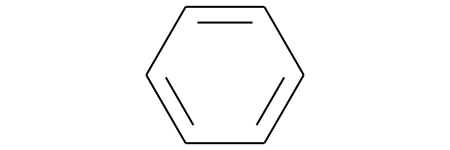

In [9]:
mol

In [10]:
mol = Chem.MolFromSmiles(opt.best_solutions['smiles'].values[0])

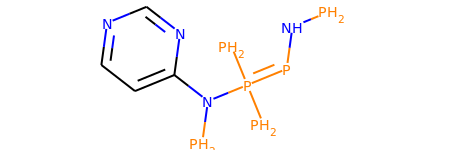

In [11]:
mol

In [12]:
opt.run(20)

Step 0, max: 0.872, min: 0.867, mean: 0.869
Step 1, max: 0.878, min: 0.869, mean: 0.871
Step 2, max: 0.881, min: 0.871, mean: 0.876
Step 3, max: 0.885, min: 0.878, mean: 0.882
Step 4, max: 0.886, min: 0.881, mean: 0.883
Step 5, max: 0.886, min: 0.881, mean: 0.883
Step 6, max: 0.886, min: 0.881, mean: 0.883
Step 7, max: 0.886, min: 0.882, mean: 0.884
Step 8, max: 0.886, min: 0.883, mean: 0.885
Step 9, max: 0.886, min: 0.883, mean: 0.885
Step 10, max: 0.886, min: 0.884, mean: 0.885
Step 11, max: 0.886, min: 0.885, mean: 0.886
Step 12, max: 0.887, min: 0.885, mean: 0.886
Step 13, max: 0.942, min: 0.885, mean: 0.896
Step 14, max: 0.942, min: 0.885, mean: 0.896
Step 15, max: 0.948, min: 0.928, mean: 0.938
Step 16, max: 0.948, min: 0.940, mean: 0.943
Step 17, max: 0.948, min: 0.941, mean: 0.944
Step 18, max: 0.948, min: 0.941, mean: 0.944
Step 19, max: 0.948, min: 0.942, mean: 0.945


[mso.swarm.Swarm num_part=200 best_fitness=0.9483804401113073]

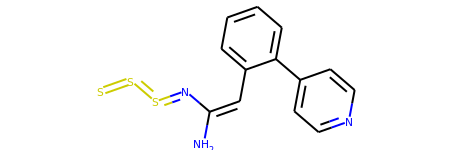

In [13]:
mol = Chem.MolFromSmiles(opt.best_solutions['smiles'].values[0])
mol

In [14]:
opt.best_solutions

,smiles,fitness
0,NC(=Cc1ccccc1-c1ccncc1)N=S=S=S,0.948380
1,NC(N=S=S=S)=C(c1ccccc1)c1ccncc1,0.947602
2,NC(N=S=S=S)=C(c1ccccc1)c1ccccc1,0.946102
3,NC(N=S=S)=C(c1ccncc1)c1ccccc1F,0.945493
4,NC(N=S=S=S)c1ccccc1-c1ccncc1,0.945365
5,NC(N=S=S=S)c1ccccc1-c1ccccc1,0.944066
6,NC(N=S=S=S)C(c1ccccc1)c1ccccc1,0.943088
7,OC(N=S=S=S)C(c1ccccc1)c1ccncc1,0.942151
8,NC(N=S=S=S)C(c1ccccc1)c1ccncc1,0.942130
9,NC(N=S=S=S=O)=C(c1ccccc1)c1ccncc1,0.941590


In [15]:
opt.best_fitness_history

,step,swarm,fitness,smiles
0,0,0,0.4426283718993647,c1ccccc1
0,1,0,0.49886610538716913,CPc1ccccc1
0,2,0,0.6665649646756738,PPPPc1ccccc1
0,3,0,0.750032404179478,CPPP(N)c1ccccc1
0,4,0,0.8187137682359975,PPPPP(N)c1ccccc1
0,5,0,0.8415953469165928,PNP(P)P(P)c1ccccc1P
0,6,0,0.8635999670289387,PNP=P(P)N(P)c1ccccc1P
0,7,0,0.8636079619878558,PNP=NC(P)N(P)c1ccccc1P
0,8,0,0.8637902176226572,PNP=NP(P)N(P)c1ccccc1P
0,9,0,0.8637902176226572,PNP=NP(P)N(P)c1ccccc1P


# An progesterone example

In [1]:
from mso.objectives.mol_functions import qed_score, penalize_macrocycles, docking_score, penalize_molecular_weight
from mso.objectives.emb_functions import distance_score
from mso.optimizer import BasePSOptimizer
from mso.objectives.scoring import ScoringFunction
from mso.objectives.mol_functions import qed_score
from cddd.inference import InferenceModel
import mso 
import cddd

init_smiles = "c1ccccc1"

RDKit WARNING: [17:03:52] Enabling RDKit 2019.09.1 jupyter extensions
/data1/zlzzheng/apps/mso/mso/objectives/mol_functions.py:224: UserWarning: failed to load reward_penalized_log_p score. Consider installing package networkx
  warnings.warn("failed to load reward_penalized_log_p score. Consider installing package networkx")
/data1/zlzzheng/apps/anaconda3/envs/graphdta/lib/python3.6/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.svm.classes module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.svm. Anything that cannot be imported from sklearn.svm is now part of the private API.
  warnings.warn(message, FutureWarning)
/data1/zlzzheng/apps/anaconda3/envs/graphdta/lib/python3.6/site-packages/sklearn/base.py:334: UserWarning: Trying to unpickle estimator SVR from version 0.19.1 when using version 0.23.2. This might lead to breaking code or invalid results. Use at

In [2]:

infer_model = InferenceModel()


smiles_embedding = infer_model.seq_to_emb([init_smiles, ])

scoring_functions = [ScoringFunction(func=docking_score, name='docking', weight=60, 
                                     is_mol_func=True, 
                                     additional_args={'receptor': "/data1/zlzzheng/apps/mso/notebooks/5xq0_A_rec.pdb_mgltools.pdbqt", 
                                                      'pocket': [39.929, 6.848, -49.476], 
                                                      'exe': "idock",
                                                      'verbose': False,
                                                     }),
                     ScoringFunction(func=qed_score, name="qed", weight=10, is_mol_func=True), 
                     ScoringFunction(func=penalize_macrocycles, weight=10, name="marcocycles", is_mol_func=True), 
                     ScoringFunction(func=penalize_molecular_weight, weight=20, name="pmw", is_mol_func=True)
                    ]

opt = BasePSOptimizer.from_query(
    init_smiles=init_smiles,
    num_part=10,
    num_swarms=1,
    inference_model=infer_model,
    scoring_functions=scoring_functions)

In [ ]:
opt.run(100)

total mols 10: docking progress 0 with score 0.364000
total mols 10: docking progress 1 with score 0.354000
total mols 10: docking progress 2 with score 0.366000
total mols 10: docking progress 3 with score 0.357000
total mols 10: docking progress 4 with score 0.361000
total mols 10: docking progress 5 with score 0.359000
total mols 10: docking progress 6 with score 0.368000
total mols 10: docking progress 7 with score 0.362000
total mols 10: docking progress 8 with score 0.362000
total mols 10: docking progress 9 with score 0.365000
Step 0, max: 0.547, min: 0.547, mean: 0.547
total mols 10: docking progress 0 with score 0.361000
total mols 10: docking progress 1 with score 0.356000
total mols 10: docking progress 2 with score 0.364000
total mols 10: docking progress 3 with score 0.356000
total mols 10: docking progress 4 with score 0.000000
total mols 10: docking progress 5 with score 0.365000
total mols 10: docking progress 6 with score 0.360000
total mols 10: docking progress 7 with

RDKit WARNING: [17:08:38] UFFTYPER: Warning: hybridization set to SP3 for atom 3


total mols 10: docking progress 8 with score 0.375000
total mols 10: docking progress 9 with score 0.000000
Step 10, max: 0.609, min: 0.583, mean: 0.593
total mols 10: docking progress 0 with score 0.447000
total mols 10: docking progress 1 with score 0.437000
total mols 10: docking progress 2 with score 0.529000
total mols 10: docking progress 3 with score 0.435000
total mols 10: docking progress 4 with score 0.456000
total mols 10: docking progress 5 with score 0.459000
total mols 10: docking progress 6 with score 0.451000
total mols 10: docking progress 7 with score 0.541000
total mols 10: docking progress 8 with score 0.421000
total mols 10: docking progress 9 with score 0.462000
Step 11, max: 0.614, min: 0.587, mean: 0.598
total mols 10: docking progress 0 with score 0.395000
total mols 10: docking progress 1 with score 0.454000
total mols 10: docking progress 2 with score 0.000000
total mols 10: docking progress 3 with score 0.478000
total mols 10: docking progress 4 with score 0

RDKit WARNING: [17:14:18] UFFTYPER: Warning: hybridization set to SP3 for atom 11


total mols 10: docking progress 8 with score 0.518000
total mols 10: docking progress 9 with score 0.000000
Step 24, max: 0.654, min: 0.628, mean: 0.638
total mols 10: docking progress 0 with score 0.485000
total mols 10: docking progress 1 with score 0.554000
total mols 10: docking progress 2 with score 0.632000
total mols 10: docking progress 3 with score 0.000000
total mols 10: docking progress 4 with score 0.607000
total mols 10: docking progress 5 with score 0.556000
total mols 10: docking progress 6 with score 0.524000
total mols 10: docking progress 7 with score 0.488000
total mols 10: docking progress 8 with score 0.447000
total mols 10: docking progress 9 with score 0.554000
Step 25, max: 0.654, min: 0.630, mean: 0.639
total mols 10: docking progress 0 with score 0.545000
total mols 10: docking progress 1 with score 0.631000
total mols 10: docking progress 2 with score 0.603000
total mols 10: docking progress 3 with score 0.000000
total mols 10: docking progress 4 with score 0

RDKit WARNING: [17:17:11] UFFTYPER: Warning: hybridization set to SP3 for atom 4


total mols 10: docking progress 3 with score 0.553000
total mols 10: docking progress 4 with score 0.572000
total mols 10: docking progress 5 with score 0.491000


RDKit WARNING: [17:17:21] UFFTYPER: Warning: hybridization set to SP3 for atom 4


total mols 10: docking progress 6 with score 0.488000
total mols 10: docking progress 7 with score 0.000000
total mols 10: docking progress 8 with score 0.573000
total mols 10: docking progress 9 with score 0.619000
Step 30, max: 0.658, min: 0.640, mean: 0.649
total mols 10: docking progress 0 with score 0.000000
total mols 10: docking progress 1 with score 0.591000
total mols 10: docking progress 2 with score 0.544000
total mols 10: docking progress 3 with score 0.538000
total mols 10: docking progress 4 with score 0.385000
total mols 10: docking progress 5 with score 0.352000


RDKit WARNING: [17:18:01] UFFTYPER: Warning: hybridization set to SP3 for atom 4


total mols 10: docking progress 6 with score 0.536000
total mols 10: docking progress 7 with score 0.000000
total mols 10: docking progress 8 with score 0.561000
total mols 10: docking progress 9 with score 0.362000
Step 31, max: 0.658, min: 0.640, mean: 0.649
total mols 10: docking progress 0 with score 0.581000
total mols 10: docking progress 1 with score 0.534000
total mols 10: docking progress 2 with score 0.593000
total mols 10: docking progress 3 with score 0.000000
total mols 10: docking progress 4 with score 0.490000
total mols 10: docking progress 5 with score 0.564000
total mols 10: docking progress 6 with score 0.578000
total mols 10: docking progress 7 with score 0.490000
total mols 10: docking progress 8 with score 0.555000
total mols 10: docking progress 9 with score 0.000000
Step 32, max: 0.658, min: 0.641, mean: 0.649
total mols 10: docking progress 0 with score 0.530000
total mols 10: docking progress 1 with score 0.538000
total mols 10: docking progress 2 with score 0

RDKit WARNING: [17:22:27] UFFTYPER: Warning: hybridization set to SP3 for atom 4


total mols 10: docking progress 6 with score 0.490000
total mols 10: docking progress 7 with score 0.469000
total mols 10: docking progress 8 with score 0.000000
total mols 10: docking progress 9 with score 0.551000
Step 39, max: 0.658, min: 0.644, mean: 0.650
total mols 10: docking progress 0 with score 0.486000
total mols 10: docking progress 1 with score 0.540000
total mols 10: docking progress 2 with score 0.000000
total mols 10: docking progress 3 with score 0.000000
total mols 10: docking progress 4 with score 0.531000
total mols 10: docking progress 5 with score 0.463000


RDKit WARNING: [17:22:55] UFFTYPER: Warning: hybridization set to SP3 for atom 4


total mols 10: docking progress 6 with score 0.432000
total mols 10: docking progress 7 with score 0.530000
total mols 10: docking progress 8 with score 0.000000
total mols 10: docking progress 9 with score 0.465000
Step 40, max: 0.658, min: 0.644, mean: 0.650
total mols 10: docking progress 0 with score 0.000000
total mols 10: docking progress 1 with score 0.608000
total mols 10: docking progress 2 with score 0.601000
total mols 10: docking progress 3 with score 0.000000
total mols 10: docking progress 4 with score 0.615000
total mols 10: docking progress 5 with score 0.601000


RDKit WARNING: [17:23:21] UFFTYPER: Warning: hybridization set to SP3 for atom 4


total mols 10: docking progress 6 with score 0.445000
total mols 10: docking progress 7 with score 0.569000
total mols 10: docking progress 8 with score 0.545000
total mols 10: docking progress 9 with score 0.568000
Step 41, max: 0.658, min: 0.644, mean: 0.650
total mols 10: docking progress 0 with score 0.000000
total mols 10: docking progress 1 with score 0.577000
total mols 10: docking progress 2 with score 0.000000
total mols 10: docking progress 3 with score 0.496000
total mols 10: docking progress 4 with score 0.000000
total mols 10: docking progress 5 with score 0.424000
total mols 10: docking progress 6 with score 0.363000
total mols 10: docking progress 7 with score 0.491000
total mols 10: docking progress 8 with score 0.559000
total mols 10: docking progress 9 with score 0.000000
Step 42, max: 0.658, min: 0.644, mean: 0.650
total mols 10: docking progress 0 with score 0.341000
total mols 10: docking progress 1 with score 0.000000
total mols 10: docking progress 2 with score 0

RDKit WARNING: [17:26:40] UFFTYPER: Warning: hybridization set to SP3 for atom 2


total mols 10: docking progress 1 with score 0.407000
total mols 10: docking progress 2 with score 0.447000
total mols 10: docking progress 3 with score 0.000000
total mols 10: docking progress 4 with score 0.000000
total mols 10: docking progress 5 with score 0.350000
total mols 10: docking progress 6 with score 0.000000
total mols 10: docking progress 7 with score 0.426000
total mols 10: docking progress 8 with score 0.558000
total mols 10: docking progress 9 with score 0.457000
Step 49, max: 0.658, min: 0.644, mean: 0.650
total mols 10: docking progress 0 with score 0.000000
total mols 10: docking progress 1 with score 0.000000
total mols 10: docking progress 2 with score 0.000000
total mols 10: docking progress 3 with score 0.538000
total mols 10: docking progress 4 with score 0.000000
total mols 10: docking progress 5 with score 0.534000
total mols 10: docking progress 6 with score 0.440000
total mols 10: docking progress 7 with score 0.548000
total mols 10: docking progress 8 wit

total mols 10: docking progress 2 with score 0.539000
total mols 10: docking progress 3 with score 0.581000
total mols 10: docking progress 4 with score 0.610000
total mols 10: docking progress 5 with score 0.000000
total mols 10: docking progress 6 with score 0.446000
total mols 10: docking progress 7 with score 0.000000
total mols 10: docking progress 8 with score 0.426000
total mols 10: docking progress 9 with score 0.000000
Step 63, max: 0.658, min: 0.644, mean: 0.650
total mols 10: docking progress 0 with score 0.623000
total mols 10: docking progress 1 with score 0.622000
total mols 10: docking progress 2 with score 0.000000
total mols 10: docking progress 3 with score 0.584000
total mols 10: docking progress 4 with score 0.629000
total mols 10: docking progress 5 with score 0.000000
total mols 10: docking progress 6 with score 0.585000
total mols 10: docking progress 7 with score 0.611000
total mols 10: docking progress 8 with score 0.623000
total mols 10: docking progress 9 wit

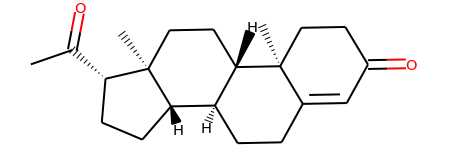

In [4]:
from rdkit import Chem
mol = Chem.MolFromSmiles(init_smiles)
mol

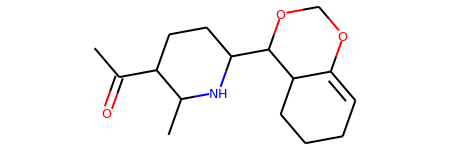

In [11]:
i = 6
m = opt.best_fitness_history.values[:, -1][i].ravel()[0]
mol = Chem.MolFromSmiles(m)
mol

In [50]:
opt.best_solutions

,smiles,fitness
0,CC(=O)C1C[CH][CH][C]1Cc1nc2ccc3c(c2[nH]1)CCC(=...,0.974065
1,CC(=O)C1C[CH][CH][C]1Cc1nc2ccc3c(c2[nH]1)CCC(=...,0.974051
2,CC(=O)[C]1[CH][CH][CH][CH][C]1Cc1nc2ccc3c(c2n1...,0.974047
3,CC(=O)C1C[CH][CH]C1Cc1nc2cc3c(cc2[nH]1)CCC(=O)C3,0.974040
4,CC(=O)C1C[CH][CH]C1Cc1nc2ccc3c(c2[nH]1)CCC(=O)C3,0.974040
5,CC(=O)C1C[CH][CH]C1Cc1n[nH]c2ccc3c(c12)CCC(=O)C3,0.974040
6,CC(=O)C1C[CH]C=C1Cc1nc2ccc3c(c2[nH]1)CCC(=O)C3,0.974032
7,CC(=O)C1[CH][CH][CH]C1Cc1nc2ccc3c(c2[nH]1)CCC(...,0.973906
8,CC(=O)[C]1[CH][CH][CH]C1Cc1nc2cc3c(cc2[nH]1)CC...,0.973846
9,CC(=O)[C]1[CH][CH][CH][C]1Cc1cc2c3c(c[nH]c3n1)...,0.973760
